In [316]:
import pandas as pd
import yaml
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

# TV Report

In [317]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
models = ['umap', 'ae', 'tae', 'convae', 'convtae']
percentages = [2.5, 5, 25, 50, 75, 100, 200]

In [318]:
reducer_data = []
new_data = {
    'dataset': None,
    'model': None,
    'percentage': None,
    'score': None
}
no_reducer_data = []
series_data = []

In [319]:
for dataset in datasets:
    try:
        no_reducer_experiment = f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml'
        with open(no_reducer_experiment) as f:
            no_reducer_score = yaml.load(f, Loader=yaml.FullLoader)['score']
    except:
        no_reducer_score = 0
    new_val = {'dataset': dataset, 'model': 'no_reducer', 'percentage': 100, 'score': no_reducer_score}
    no_reducer_data.append(new_val)
    for model in models:
        percentage_data = []
        for percentage in percentages:
            experiment_name = f'P10_{model}_{dataset}_p{percentage}'
            if model == 'umap':
                experiment_name = experiment_name[4:]
            try:
                experiment_data = pd.read_csv(f'../experiments/{experiment_name}/data.csv')
                data_max_value = experiment_data['score'].max()
            except:
                data_max_value = 0
                print(f'No data for {experiment_name}')
            percentage_data.append(data_max_value)
            new_data['dataset'] = dataset
            new_data['model'] = model
            new_data['percentage'] = percentage
            new_data['score'] = data_max_value
            reducer_data.append(new_data.copy())
        series_data.append({'dataset': dataset, 'model': model, 'data': percentage_data})

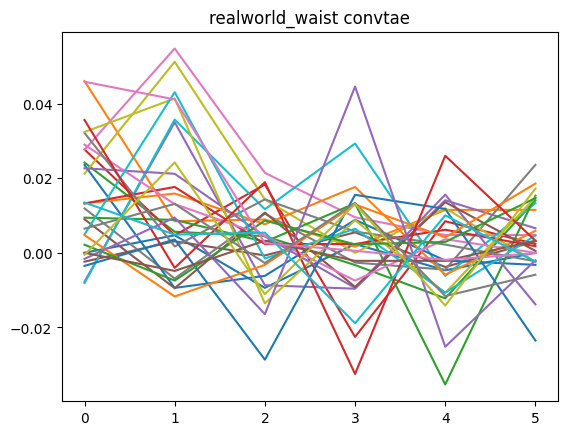

In [320]:
series_data_df = pd.DataFrame(series_data)
for val in series_data_df.values:
    # print(val[0], np.diff(val[2]))
    pd.Series(np.diff(val[2])).plot(kind='line', title=f'{val[0]} {val[1]}')
# plt.ylim(-0.1, 0.1)
plt.show()

In [321]:
np.diff([1,5,10])

array([4, 5])

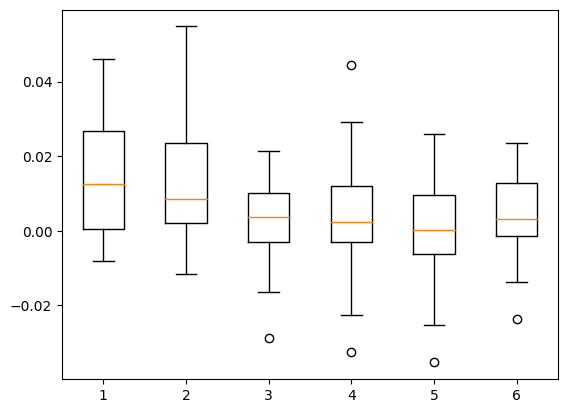

In [322]:
diffs_data = []
for key, group in pd.DataFrame(reducer_data).groupby(['dataset', 'model']):
    # print(key, np.diff(group['score']))
    diffs_data.append(np.diff(group['score']))
# print(np.array(diffs_data))
plt.boxplot(np.array(diffs_data))
plt.show()
# plt.ylim(-0.1, 0.1)

In [323]:
data = pd.DataFrame(reducer_data)
no_reducer_data = pd.DataFrame(no_reducer_data)
# Divide data by noreducerdata by dataset
for dataset in datasets:
    no_reducer_score = no_reducer_data[no_reducer_data['dataset'] == dataset]['score'].values[0]
    data.loc[data['dataset'] == dataset, 'score'] = data.loc[data['dataset'] == dataset, 'score'] / no_reducer_score

In [324]:
data = pd.concat([pd.DataFrame(data), pd.DataFrame(no_reducer_data)]).reset_index(drop=True)

In [325]:
data

,dataset,model,percentage,score
0,kuhar,umap,2.5,0.633088
1,kuhar,umap,5.0,0.633088
2,kuhar,umap,25.0,0.640084
3,kuhar,umap,50.0,0.626093
4,kuhar,umap,75.0,0.629591
...,...,...,...,...
211,motionsense,no_reducer,100.0,0.785952
212,uci,no_reducer,100.0,0.847059
213,wisdm,no_reducer,100.0,0.747373
214,realworld_thigh,no_reducer,100.0,0.671521


In [326]:
rows = []
for key, group in data.groupby(['model', 'percentage']):
    group.drop(['model', 'percentage'], axis=1, inplace=True)
    # Round numbers
    
    group = group.set_index('dataset')
    group['score'] = group['score'].apply(lambda x: round(x, 2))
    group['VALUE'] = (group['score']).astype(str)# + '%(' + group['best'].apply(str.upper) + ')'
    group = group.drop(['score'], axis=1)
    # print(group)
    group = group.T
    
    # print(group.loc['best'], '\nnnn')
    # Add key
    group['model'] = key[0]
    group['percentage'] = key[1]
    rows.append(group)
table3 = pd.concat(rows)
# Reorder columns
# print(tabulate(table3, headers='keys', tablefmt='psql'))
table3 = table3[['model', 'percentage', 'uci', 'motionsense', 'kuhar', 'wisdm', 'realworld_thigh', 'realworld_waist']]
table3 = table3.reset_index(drop=True)
# Change column names
table3 = table3.rename(columns={'uci': 'UCI', 'motionsense': 'MS', 'kuhar': 'KH', 'wisdm': 'WISDM', 'realworld_thigh': 'RW-T', 'realworld_waist': 'RW-W'})
print(tabulate(table3, headers='keys', tablefmt='latex', showindex=False))

\begin{tabular}{lrrrrrrr}
\hline
 model      &   percentage &   UCI &   MS &   KH &   WISDM &   RW-T &   RW-W \\
\hline
 ae         &          2.5 &  0.9  & 0.85 & 0.89 &    0.97 &   0.98 &   0.95 \\
 ae         &          5   &  0.92 & 0.89 & 0.96 &    1.01 &   0.98 &   1.01 \\
 ae         &         25   &  0.94 & 0.96 & 0.98 &    1.03 &   0.97 &   1.06 \\
 ae         &         50   &  0.95 & 0.98 & 0.99 &    1.04 &   0.96 &   1.07 \\
 ae         &         75   &  0.97 & 1    & 0.99 &    1.03 &   0.98 &   1.07 \\
 ae         &        100   &  0.96 & 1    & 1.01 &    1.03 &   0.99 &   1.07 \\
 ae         &        200   &  0.97 & 1.01 & 1.03 &    1.03 &   1.02 &   1.07 \\
 convae     &          2.5 &  0.93 & 0.9  & 1.09 &    0.99 &   1.05 &   1.03 \\
 convae     &          5   &  0.95 & 0.93 & 1.13 &    1.03 &   1.1  &   1.03 \\
 convae     &         25   &  0.97 & 0.99 & 1.14 &    1.09 &   1.1  &   1.06 \\
 convae     &         50   &  0.97 & 1.01 & 1.17 &    1.07 &   1.13 &   1.04 \\


In [327]:
# Autoencoders data
ae_data = table3[table3['model'] == 'ae'].copy().reset_index(drop=True)
# TAE data
tae_data = table3[table3['model'] == 'tae'].copy().reset_index(drop=True)
# ConvAE data
convae_data = table3[table3['model'] == 'convae'].copy().reset_index(drop=True)
# ConvTAE data
convtae_data = table3[table3['model'] == 'convtae'].copy().reset_index(drop=True)
# UMAP data
umap_data = table3[table3['model'] == 'umap'].copy().reset_index(drop=True)
# Data for percentage 200
data_200 = table3[table3['percentage'] == 200].copy().reset_index(drop=True)

# Print tables
print(tabulate(ae_data, headers='keys', tablefmt='psql'))
print(tabulate(tae_data, headers='keys', tablefmt='psql'))
print(tabulate(convae_data, headers='keys', tablefmt='psql'))
print(tabulate(convtae_data, headers='keys', tablefmt='psql'))
print(tabulate(umap_data, headers='keys', tablefmt='psql'))
print(tabulate(data_200, headers='keys', tablefmt='psql'))

+----+---------+--------------+-------+------+------+---------+--------+--------+
|    | model   |   percentage |   UCI |   MS |   KH |   WISDM |   RW-T |   RW-W |
|----+---------+--------------+-------+------+------+---------+--------+--------|
|  0 | ae      |          2.5 |  0.9  | 0.85 | 0.89 |    0.97 |   0.98 |   0.95 |
|  1 | ae      |          5   |  0.92 | 0.89 | 0.96 |    1.01 |   0.98 |   1.01 |
|  2 | ae      |         25   |  0.94 | 0.96 | 0.98 |    1.03 |   0.97 |   1.06 |
|  3 | ae      |         50   |  0.95 | 0.98 | 0.99 |    1.04 |   0.96 |   1.07 |
|  4 | ae      |         75   |  0.97 | 1    | 0.99 |    1.03 |   0.98 |   1.07 |
|  5 | ae      |        100   |  0.96 | 1    | 1.01 |    1.03 |   0.99 |   1.07 |
|  6 | ae      |        200   |  0.97 | 1.01 | 1.03 |    1.03 |   1.02 |   1.07 |
+----+---------+--------------+-------+------+------+---------+--------+--------+
+----+---------+--------------+-------+------+------+---------+--------+--------+
|    | model   |

In [328]:
columns = ['UCI', 'MS', 'KH', 'WISDM', 'RW Thigh', 'RW Waist']

In [329]:
perc_data = ae_data[columns].astype(float) + tae_data[columns].astype(float) + convae_data[columns].astype(float) + convtae_data[columns].astype(float) + umap_data[columns].astype(float)
print(tabulate(perc_data, headers='keys', tablefmt='psql'))

KeyError: "['RW Thigh', 'RW Waist'] not in index"

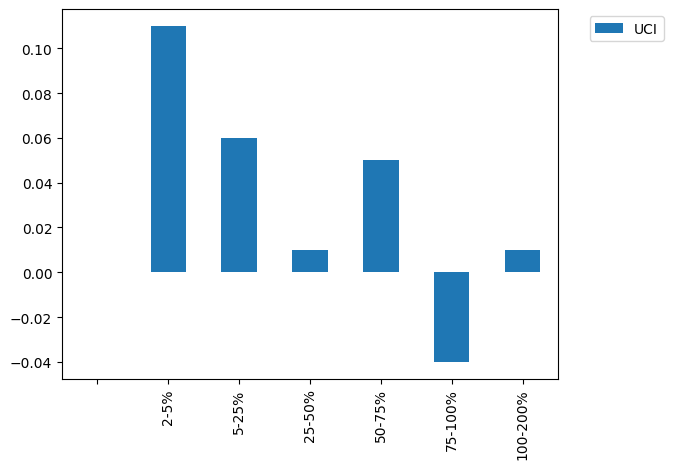

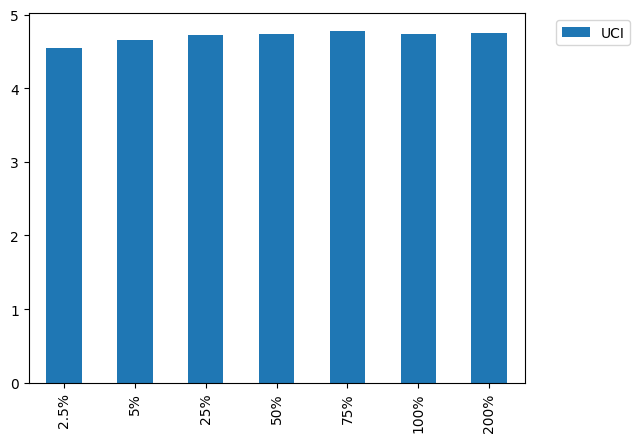

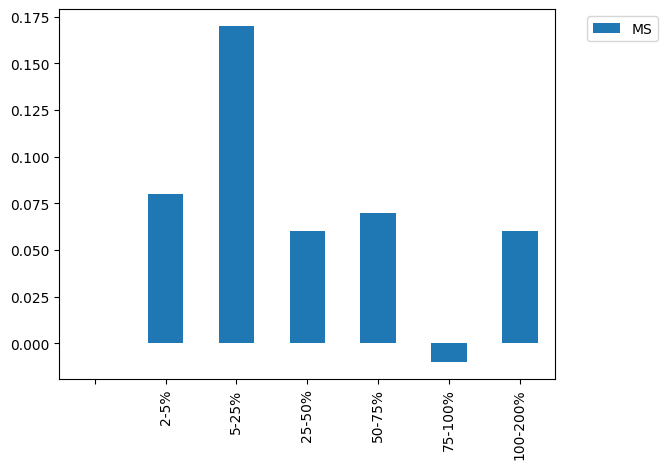

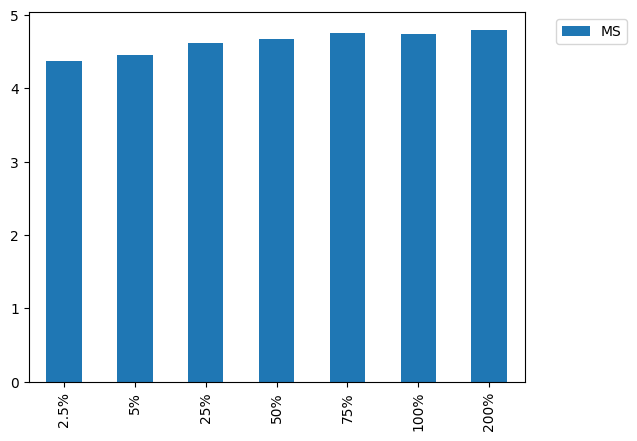

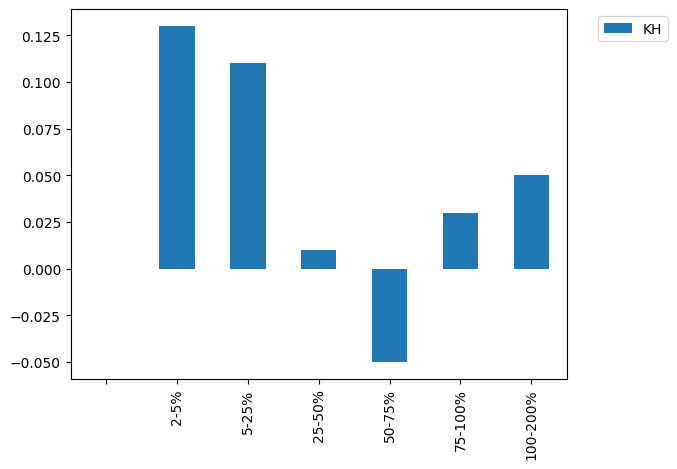

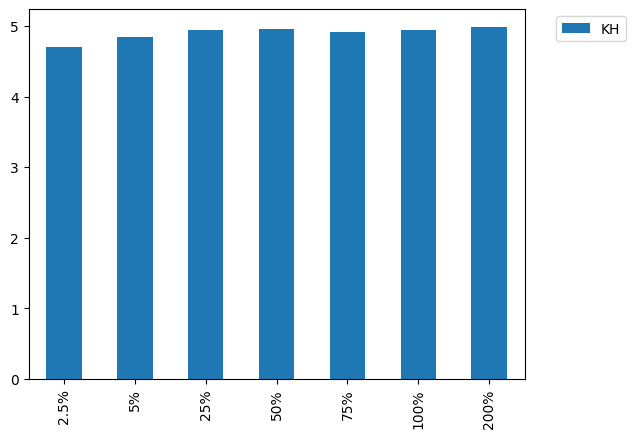

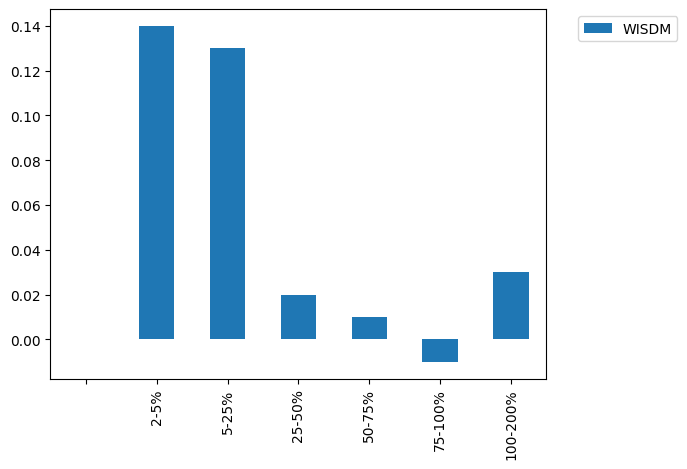

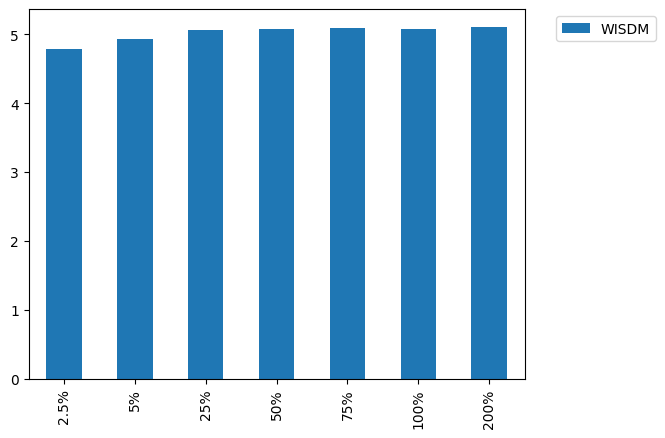

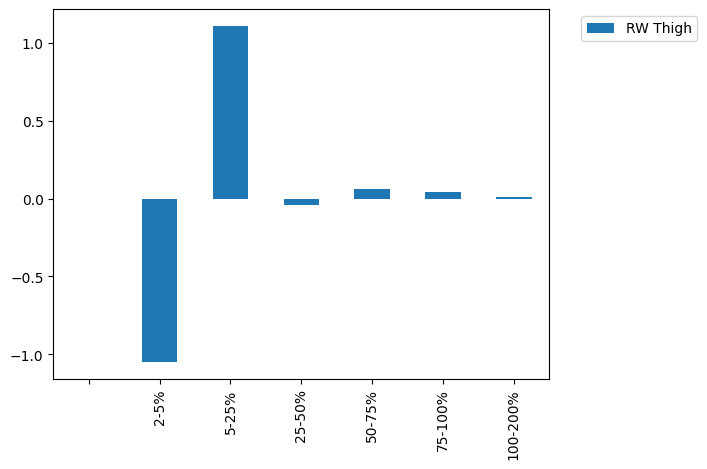

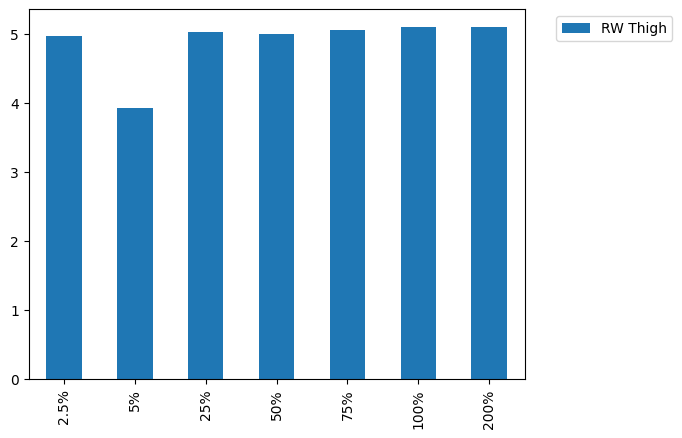

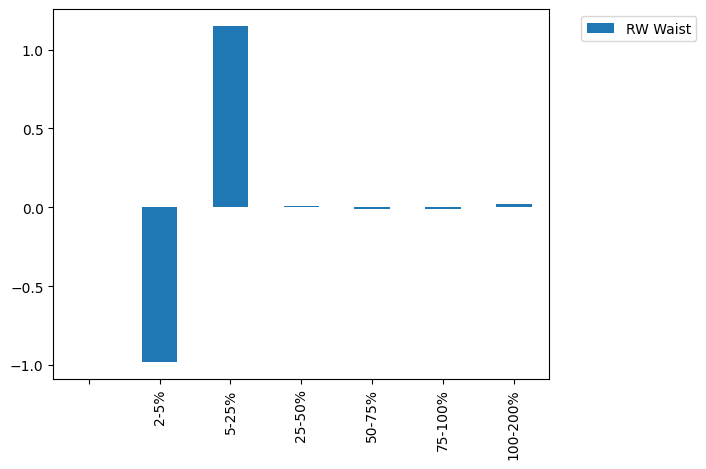

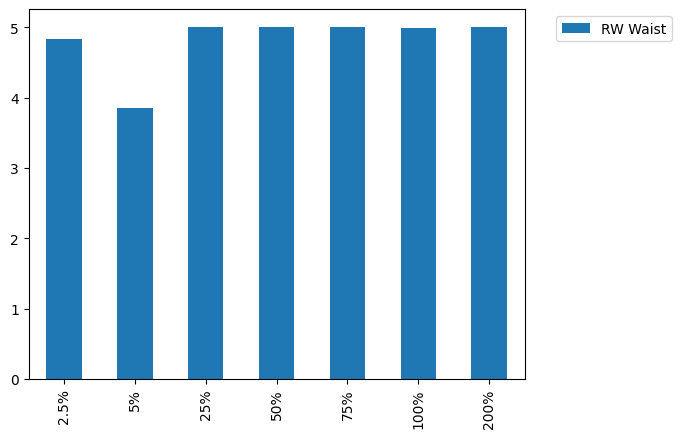

In [ ]:
import matplotlib.pyplot as plt
for col in columns:
    perc_data[col].diff().plot.bar()
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ['', '2-5%', '5-25%', '25-50%', '50-75%', '75-100%', '100-200%'])
    plt.show()
    perc_data[col].plot.bar()
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ['2.5%', '5%', '25%', '50%', '75%', '100%', '200%'])
    plt.show()

In [ ]:
tae_data[columns] = tae_data[columns].astype(float) - ae_data[columns].astype(float)
convae_data[columns] = convae_data[columns].astype(float) - ae_data[columns].astype(float)
convtae_data[columns] = convtae_data[columns].astype(float) - ae_data[columns].astype(float)
umap_data[columns] = umap_data[columns].astype(float) - ae_data[columns].astype(float)
table4 = pd.concat([tae_data, convae_data, convtae_data]).reset_index(drop=True)
table5 = pd.concat([umap_data]).reset_index(drop=True)

In [ ]:
print(tabulate(table4, headers='keys', tablefmt='latex', showindex=False))

\begin{tabular}{lrrrrrrr}
\hline
 model   &   percentage &   UCI &    MS &    KH &   WISDM &   RW Thigh &   RW Waist \\
\hline
 tae     &          2.5 &  0    &  0    &  0.08 &   -0.02 &      -0.04 &       0.03 \\
 tae     &          5   & -0.01 & -0.02 &  0.05 &   -0.01 &      -0.03 &      -0.03 \\
 tae     &         25   & -0.02 & -0.1  &  0.04 &   -0.03 &      -0.03 &      -0.06 \\
 tae     &         50   & -0.03 & -0.11 &  0.03 &   -0.02 &      -0.01 &      -0.07 \\
 tae     &         75   & -0.03 & -0.13 &  0.03 &    0    &      -0.03 &      -0.06 \\
 tae     &        100   & -0.07 & -0.14 & -0.01 &    0    &      -0.03 &      -0.07 \\
 tae     &        200   & -0.06 & -0.12 & -0.01 &    0    &      -0.04 &      -0.08 \\
 convae  &          2.5 &  0.03 &  0.05 &  0.2  &    0.02 &       0.07 &       0.08 \\
 convae  &          5   &  0.03 &  0.04 &  0.17 &    0.02 &       0.12 &       0.02 \\
 convae  &         25   &  0.03 &  0.03 &  0.16 &    0.06 &       0.13 &       0    \\
 co

In [ ]:
print(tabulate(table5, headers='keys', tablefmt='latex', showindex=False))

\begin{tabular}{lrrrrrrr}
\hline
 model   &   percentage &   UCI &    MS &    KH &   WISDM &   RW Thigh &   RW Waist \\
\hline
 umap    &          2.5 & -0.01 & -0.02 & -0.26 &   -0.13 &      -0.09 &      -0.12 \\
 umap    &          5   &  0    & -0.06 & -0.33 &   -0.16 &      -0.09 &      -0.18 \\
 umap    &         25   & -0.03 & -0.13 & -0.34 &   -0.19 &      -0.08 &      -0.24 \\
 umap    &         50   & -0.05 & -0.15 & -0.36 &   -0.19 &      -0.11 &      -0.24 \\
 umap    &         75   & -0.06 & -0.16 & -0.36 &   -0.19 &      -0.11 &      -0.25 \\
 umap    &        100   & -0.05 & -0.17 & -0.39 &   -0.17 &      -0.1  &      -0.25 \\
 umap    &        200   & -0.07 & -0.17 & -0.41 &   -0.17 &      -0.17 &      -0.24 \\
\hline
\end{tabular}


In [ ]:
print(tabulate(data_200, headers='keys', tablefmt='latex', showindex=False))

\begin{tabular}{lrrrrrrr}
\hline
 model   &   percentage &   UCI &   MS &   KH &   WISDM &   RW Thigh &   RW Waist \\
\hline
 ae      &          200 &  0.97 & 1.01 & 1.03 &    1.03 &       1.02 &       1.07 \\
 convae  &          200 &  0.99 & 1.02 & 1.15 &    1.09 &       1.12 &       1.07 \\
 convtae &          200 &  0.98 & 1.04 & 1.17 &    1.1  &       1.13 &       1.05 \\
 tae     &          200 &  0.91 & 0.89 & 1.02 &    1.03 &       0.98 &       0.99 \\
 umap    &          200 &  0.9  & 0.84 & 0.62 &    0.86 &       0.85 &       0.83 \\
\hline
\end{tabular}
